# 极限挑战 bullet scrren analysis - Tencent Video

analysis about bullet screen from the variety shows *极限挑战* season 1 episode 1 on video website Tencent Video

In [1]:
import pandas as pd
import requests
import json
import jieba #中文分词
import matplotlib.pyplot as plt
import numpy as np
from jieba import analyse

## 弹幕获取

In [2]:
# https://dm.video.qq.com/barrage/segment/r0016xsgeil/t/1627911651/150000/180000/041902a_1656776035
danmu_template = "https://dm.video.qq.com/barrage/segment/r0016xsgeil/"

In [3]:
# obtained form https://dm.video.qq.com/barrage/base/r0016xsgeil
qq_time_dic = {"0":{"segment_start":"0","segment_name":"t/1627911651/0/30000/041902a_1656776035"},"30000":{"segment_start":"30000","segment_name":"t/1627911651/30000/60000/041902a_1656776035"},"60000":{"segment_start":"60000","segment_name":"t/1627911651/60000/90000/041902a_1656776035"},"90000":{"segment_start":"90000","segment_name":"t/1627911651/90000/120000/041902a_1656776035"},"120000":{"segment_start":"120000","segment_name":"t/1627911651/120000/150000/041902a_1656776035"},"150000":{"segment_start":"150000","segment_name":"t/1627911651/150000/180000/041902a_1656776035"},"180000":{"segment_start":"180000","segment_name":"t/1627911651/180000/210000/041902a_1656776035"},"210000":{"segment_start":"210000","segment_name":"t/1627911651/210000/240000/041902a_1656776035"},"240000":{"segment_start":"240000","segment_name":"t/1627911651/240000/270000/041902a_1656776035"},"270000":{"segment_start":"270000","segment_name":"t/1627911651/270000/300000/041902a_1656776035"},"300000":{"segment_start":"300000","segment_name":"t/1627911651/300000/330000/041902a_1656776035"},"330000":{"segment_start":"330000","segment_name":"t/1627911651/330000/360000/041902a_1656776035"},"360000":{"segment_start":"360000","segment_name":"t/1627911651/360000/390000/041902a_1656776035"},"390000":{"segment_start":"390000","segment_name":"t/1627911651/390000/420000/041902a_1656776035"},"420000":{"segment_start":"420000","segment_name":"t/1627911651/420000/450000/041902a_1656776035"},"450000":{"segment_start":"450000","segment_name":"t/1627911651/450000/480000/041902a_1656776035"},"480000":{"segment_start":"480000","segment_name":"t/1627911651/480000/510000/041902a_1656776035"},"510000":{"segment_start":"510000","segment_name":"t/1627911651/510000/540000/041902a_1656776035"},"540000":{"segment_start":"540000","segment_name":"t/1627911651/540000/570000/041902a_1656776035"},"570000":{"segment_start":"570000","segment_name":"t/1627911651/570000/600000/041902a_1656776035"},"600000":{"segment_start":"600000","segment_name":"t/1627911651/600000/630000/041902a_1656776035"},"630000":{"segment_start":"630000","segment_name":"t/1627911651/630000/660000/041902a_1656776035"},"660000":{"segment_start":"660000","segment_name":"t/1627911651/660000/690000/041902a_1656776035"},"690000":{"segment_start":"690000","segment_name":"t/1627911651/690000/720000/041902a_1656776035"},"720000":{"segment_start":"720000","segment_name":"t/1627911651/720000/750000/041902a_1656776035"},"750000":{"segment_start":"750000","segment_name":"t/1627911651/750000/780000/041902a_1656776035"},"780000":{"segment_start":"780000","segment_name":"t/1627911651/780000/810000/041902a_1656776035"},"810000":{"segment_start":"810000","segment_name":"t/1627911651/810000/840000/041902a_1656776035"},"840000":{"segment_start":"840000","segment_name":"t/1627911651/840000/870000/041902a_1656776035"},"870000":{"segment_start":"870000","segment_name":"t/1627911651/870000/900000/041902a_1656776035"},"900000":{"segment_start":"900000","segment_name":"t/1627911651/900000/930000/041902a_1656776035"},"930000":{"segment_start":"930000","segment_name":"t/1627911651/930000/960000/041902a_1656776035"},"960000":{"segment_start":"960000","segment_name":"t/1627911651/960000/990000/041902a_1656776035"},"990000":{"segment_start":"990000","segment_name":"t/1627911651/990000/1020000/041902a_1656776035"},"1020000":{"segment_start":"1020000","segment_name":"t/1627911651/1020000/1050000/041902a_1656776035"},"1050000":{"segment_start":"1050000","segment_name":"t/1627911651/1050000/1080000/041902a_1656776035"},"1080000":{"segment_start":"1080000","segment_name":"t/1627911651/1080000/1110000/041902a_1656776035"},"1110000":{"segment_start":"1110000","segment_name":"t/1627911651/1110000/1140000/041902a_1656776035"},"1140000":{"segment_start":"1140000","segment_name":"t/1627911651/1140000/1170000/041902a_1656776035"},"1170000":{"segment_start":"1170000","segment_name":"t/1627911651/1170000/1200000/041902a_1656776035"},"1200000":{"segment_start":"1200000","segment_name":"t/1627911651/1200000/1230000/041902a_1656776035"},"1230000":{"segment_start":"1230000","segment_name":"t/1627911651/1230000/1260000/041902a_1656776035"},"1260000":{"segment_start":"1260000","segment_name":"t/1627911651/1260000/1290000/041902a_1656776035"},"1290000":{"segment_start":"1290000","segment_name":"t/1627911651/1290000/1320000/041902a_1656776035"},"1320000":{"segment_start":"1320000","segment_name":"t/1627911651/1320000/1350000/041902a_1656776035"},"1350000":{"segment_start":"1350000","segment_name":"t/1627911651/1350000/1380000/041902a_1656776035"},"1380000":{"segment_start":"1380000","segment_name":"t/1627911651/1380000/1410000/041902a_1656776035"},"1410000":{"segment_start":"1410000","segment_name":"t/1627911651/1410000/1440000/041902a_1656776035"},"1440000":{"segment_start":"1440000","segment_name":"t/1627911651/1440000/1470000/041902a_1656776035"},"1470000":{"segment_start":"1470000","segment_name":"t/1627911651/1470000/1500000/041902a_1656776035"},"1500000":{"segment_start":"1500000","segment_name":"t/1627911651/1500000/1530000/041902a_1656776035"},"1530000":{"segment_start":"1530000","segment_name":"t/1627911651/1530000/1560000/041902a_1656776035"},"1560000":{"segment_start":"1560000","segment_name":"t/1627911651/1560000/1590000/041902a_1656776035"},"1590000":{"segment_start":"1590000","segment_name":"t/1627911651/1590000/1620000/041902a_1656776035"},"1620000":{"segment_start":"1620000","segment_name":"t/1627911651/1620000/1650000/041902a_1656776035"},"1650000":{"segment_start":"1650000","segment_name":"t/1627911651/1650000/1680000/041902a_1656776035"},"1680000":{"segment_start":"1680000","segment_name":"t/1627911651/1680000/1710000/041902a_1656776035"},"1710000":{"segment_start":"1710000","segment_name":"t/1627911651/1710000/1740000/041902a_1656776035"},"1740000":{"segment_start":"1740000","segment_name":"t/1627911651/1740000/1770000/041902a_1656776035"},"1770000":{"segment_start":"1770000","segment_name":"t/1627911651/1770000/1800000/041902a_1656776035"},"1800000":{"segment_start":"1800000","segment_name":"t/1627911651/1800000/1830000/041902a_1656776035"},"1830000":{"segment_start":"1830000","segment_name":"t/1627911651/1830000/1860000/041902a_1656776035"},"1860000":{"segment_start":"1860000","segment_name":"t/1627911651/1860000/1890000/041902a_1656776035"},"1890000":{"segment_start":"1890000","segment_name":"t/1627911651/1890000/1920000/041902a_1656776035"},"1920000":{"segment_start":"1920000","segment_name":"t/1627911651/1920000/1950000/041902a_1656776035"},"1950000":{"segment_start":"1950000","segment_name":"t/1627911651/1950000/1980000/041902a_1656776035"},"1980000":{"segment_start":"1980000","segment_name":"t/1627911651/1980000/2010000/041902a_1656776035"},"2010000":{"segment_start":"2010000","segment_name":"t/1627911651/2010000/2040000/041902a_1656776035"},"2040000":{"segment_start":"2040000","segment_name":"t/1627911651/2040000/2070000/041902a_1656776035"},"2070000":{"segment_start":"2070000","segment_name":"t/1627911651/2070000/2100000/041902a_1656776035"},"2100000":{"segment_start":"2100000","segment_name":"t/1627911651/2100000/2130000/041902a_1656776035"},"2130000":{"segment_start":"2130000","segment_name":"t/1627911651/2130000/2160000/041902a_1656776035"},"2160000":{"segment_start":"2160000","segment_name":"t/1627911651/2160000/2190000/041902a_1656776035"},"2190000":{"segment_start":"2190000","segment_name":"t/1627911651/2190000/2220000/041902a_1656776035"},"2220000":{"segment_start":"2220000","segment_name":"t/1627911651/2220000/2250000/041902a_1656776035"},"2250000":{"segment_start":"2250000","segment_name":"t/1627911651/2250000/2280000/041902a_1656776035"},"2280000":{"segment_start":"2280000","segment_name":"t/1627911651/2280000/2310000/041902a_1656776035"},"2310000":{"segment_start":"2310000","segment_name":"t/1627911651/2310000/2340000/041902a_1656776035"},"2340000":{"segment_start":"2340000","segment_name":"t/1627911651/2340000/2370000/041902a_1656776035"},"2370000":{"segment_start":"2370000","segment_name":"t/1627911651/2370000/2400000/041902a_1656776035"},"2400000":{"segment_start":"2400000","segment_name":"t/1627911651/2400000/2430000/041902a_1656776035"},"2430000":{"segment_start":"2430000","segment_name":"t/1627911651/2430000/2460000/041902a_1656776035"},"2460000":{"segment_start":"2460000","segment_name":"t/1627911651/2460000/2490000/041902a_1656776035"},"2490000":{"segment_start":"2490000","segment_name":"t/1627911651/2490000/2520000/041902a_1656776035"},"2520000":{"segment_start":"2520000","segment_name":"t/1627911651/2520000/2550000/041902a_1656776035"},"2550000":{"segment_start":"2550000","segment_name":"t/1627911651/2550000/2580000/041902a_1656776035"},"2580000":{"segment_start":"2580000","segment_name":"t/1627911651/2580000/2610000/041902a_1656776035"},"2610000":{"segment_start":"2610000","segment_name":"t/1627911651/2610000/2640000/041902a_1656776035"},"2640000":{"segment_start":"2640000","segment_name":"t/1627911651/2640000/2670000/041902a_1656776035"},"2670000":{"segment_start":"2670000","segment_name":"t/1627911651/2670000/2700000/041902a_1656776035"},"2700000":{"segment_start":"2700000","segment_name":"t/1627911651/2700000/2730000/041902a_1656776035"},"2730000":{"segment_start":"2730000","segment_name":"t/1627911651/2730000/2760000/041902a_1656776035"},"2760000":{"segment_start":"2760000","segment_name":"t/1627911651/2760000/2790000/041902a_1656776035"},"2790000":{"segment_start":"2790000","segment_name":"t/1627911651/2790000/2820000/041902a_1656776035"},"2820000":{"segment_start":"2820000","segment_name":"t/1627911651/2820000/2850000/041902a_1656776035"},"2850000":{"segment_start":"2850000","segment_name":"t/1627911651/2850000/2880000/041902a_1656776035"},"2880000":{"segment_start":"2880000","segment_name":"t/1627911651/2880000/2910000/041902a_1656776035"},"2910000":{"segment_start":"2910000","segment_name":"t/1627911651/2910000/2940000/041902a_1656776035"},"2940000":{"segment_start":"2940000","segment_name":"t/1627911651/2940000/2970000/041902a_1656776035"},"2970000":{"segment_start":"2970000","segment_name":"t/1627911651/2970000/3000000/041902a_1656776035"},"3000000":{"segment_start":"3000000","segment_name":"t/1627911651/3000000/3030000/041902a_1656776035"},"3030000":{"segment_start":"3030000","segment_name":"t/1627911651/3030000/3060000/041902a_1656776035"},"3060000":{"segment_start":"3060000","segment_name":"t/1627911651/3060000/3090000/041902a_1656776035"},"3090000":{"segment_start":"3090000","segment_name":"t/1627911651/3090000/3120000/041902a_1656776035"},"3120000":{"segment_start":"3120000","segment_name":"t/1627911651/3120000/3150000/041902a_1656776035"},"3150000":{"segment_start":"3150000","segment_name":"t/1627911651/3150000/3180000/041902a_1656776035"},"3180000":{"segment_start":"3180000","segment_name":"t/1627911651/3180000/3210000/041902a_1656776035"},"3210000":{"segment_start":"3210000","segment_name":"t/1627911651/3210000/3240000/041902a_1656776035"},"3240000":{"segment_start":"3240000","segment_name":"t/1627911651/3240000/3270000/041902a_1656776035"},"3270000":{"segment_start":"3270000","segment_name":"t/1627911651/3270000/3300000/041902a_1656776035"},"3300000":{"segment_start":"3300000","segment_name":"t/1627911651/3300000/3330000/041902a_1656776035"},"3330000":{"segment_start":"3330000","segment_name":"t/1627911651/3330000/3360000/041902a_1656776035"},"3360000":{"segment_start":"3360000","segment_name":"t/1627911651/3360000/3390000/041902a_1656776035"},"3390000":{"segment_start":"3390000","segment_name":"t/1627911651/3390000/3420000/041902a_1656776035"},"3420000":{"segment_start":"3420000","segment_name":"t/1627911651/3420000/3450000/041902a_1656776035"},"3450000":{"segment_start":"3450000","segment_name":"t/1627911651/3450000/3480000/041902a_1656776035"},"3480000":{"segment_start":"3480000","segment_name":"t/1627911651/3480000/3510000/041902a_1656776035"},"3510000":{"segment_start":"3510000","segment_name":"t/1627911651/3510000/3540000/041902a_1656776035"},"3540000":{"segment_start":"3540000","segment_name":"t/1627911651/3540000/3570000/041902a_1656776035"},"3570000":{"segment_start":"3570000","segment_name":"t/1627911651/3570000/3600000/041902a_1656776035"},"3600000":{"segment_start":"3600000","segment_name":"t/1627911651/3600000/3630000/041902a_1656776035"},"3630000":{"segment_start":"3630000","segment_name":"t/1627911651/3630000/3660000/041902a_1656776035"},"3660000":{"segment_start":"3660000","segment_name":"t/1627911651/3660000/3690000/041902a_1656776035"},"3690000":{"segment_start":"3690000","segment_name":"t/1627911651/3690000/3720000/041902a_1656776035"},"3720000":{"segment_start":"3720000","segment_name":"t/1627911651/3720000/3750000/041902a_1656776035"},"3750000":{"segment_start":"3750000","segment_name":"t/1627911651/3750000/3780000/041902a_1656776035"},"3780000":{"segment_start":"3780000","segment_name":"t/1627911651/3780000/3810000/041902a_1656776035"},"3810000":{"segment_start":"3810000","segment_name":"t/1627911651/3810000/3840000/041902a_1656776035"},"3840000":{"segment_start":"3840000","segment_name":"t/1627911651/3840000/3870000/041902a_1656776035"},"3870000":{"segment_start":"3870000","segment_name":"t/1627911651/3870000/3900000/041902a_1656776035"},"3900000":{"segment_start":"3900000","segment_name":"t/1627911651/3900000/3930000/041902a_1656776035"},"3930000":{"segment_start":"3930000","segment_name":"t/1627911651/3930000/3960000/041902a_1656776035"},"3960000":{"segment_start":"3960000","segment_name":"t/1627911651/3960000/3990000/041902a_1656776035"},"3990000":{"segment_start":"3990000","segment_name":"t/1627911651/3990000/4020000/041902a_1656776035"},"4020000":{"segment_start":"4020000","segment_name":"t/1627911651/4020000/4050000/041902a_1656776035"},"4050000":{"segment_start":"4050000","segment_name":"t/1627911651/4050000/4080000/041902a_1656776035"},"4080000":{"segment_start":"4080000","segment_name":"t/1627911651/4080000/4110000/041902a_1656776035"},"4110000":{"segment_start":"4110000","segment_name":"t/1627911651/4110000/4140000/041902a_1656776035"},"4140000":{"segment_start":"4140000","segment_name":"t/1627911651/4140000/4170000/041902a_1656776035"},"4170000":{"segment_start":"4170000","segment_name":"t/1627911651/4170000/4200000/041902a_1656776035"},"4200000":{"segment_start":"4200000","segment_name":"t/1627911651/4200000/4230000/041902a_1656776035"},"4230000":{"segment_start":"4230000","segment_name":"t/1627911651/4230000/4260000/041902a_1656776035"},"4260000":{"segment_start":"4260000","segment_name":"t/1627911651/4260000/4290000/041902a_1656776035"},"4290000":{"segment_start":"4290000","segment_name":"t/1627911651/4290000/4320000/041902a_1656776035"},"4320000":{"segment_start":"4320000","segment_name":"t/1627911651/4320000/4350000/041902a_1656776035"},"4350000":{"segment_start":"4350000","segment_name":"t/1627911651/4350000/4380000/041902a_1656776035"},"4380000":{"segment_start":"4380000","segment_name":"t/1627911651/4380000/4410000/041902a_1656776035"},"4410000":{"segment_start":"4410000","segment_name":"t/1627911651/4410000/4440000/041902a_1656776035"},"4440000":{"segment_start":"4440000","segment_name":"t/1627911651/4440000/4470000/041902a_1656776035"},"4470000":{"segment_start":"4470000","segment_name":"t/1627911651/4470000/4500000/041902a_1656776035"},"4500000":{"segment_start":"4500000","segment_name":"t/1627911651/4500000/4530000/041902a_1656776035"},"4530000":{"segment_start":"4530000","segment_name":"t/1627911651/4530000/4560000/041902a_1656776035"},"4560000":{"segment_start":"4560000","segment_name":"t/1627911651/4560000/4590000/041902a_1656776035"},"4590000":{"segment_start":"4590000","segment_name":"t/1627911651/4590000/4620000/041902a_1656776035"},"4620000":{"segment_start":"4620000","segment_name":"t/1627911651/4620000/4650000/041902a_1656776035"},"4650000":{"segment_start":"4650000","segment_name":"t/1627911651/4650000/4680000/041902a_1656776035"},"4680000":{"segment_start":"4680000","segment_name":"t/1627911651/4680000/4710000/041902a_1656776035"},"4710000":{"segment_start":"4710000","segment_name":"t/1627911651/4710000/4740000/041902a_1656776035"},"4740000":{"segment_start":"4740000","segment_name":"t/1627911651/4740000/4770000/041902a_1656776035"},"4770000":{"segment_start":"4770000","segment_name":"t/1627911651/4770000/4800000/041902a_1656776035"},"4800000":{"segment_start":"4800000","segment_name":"t/1627911651/4800000/4830000/041902a_1656776035"},"4830000":{"segment_start":"4830000","segment_name":"t/1627911651/4830000/4860000/041902a_1656776035"},"4860000":{"segment_start":"4860000","segment_name":"t/1627911651/4860000/4890000/041902a_1656776035"},"4890000":{"segment_start":"4890000","segment_name":"t/1627911651/4890000/4920000/041902a_1656776035"},"4920000":{"segment_start":"4920000","segment_name":"t/1627911651/4920000/4950000/041902a_1656776035"},"4950000":{"segment_start":"4950000","segment_name":"t/1627911651/4950000/4980000/041902a_1656776035"},"4980000":{"segment_start":"4980000","segment_name":"t/1627911651/4980000/5010000/041902a_1656776035"},"5010000":{"segment_start":"5010000","segment_name":"t/1627911651/5010000/5040000/041902a_1656776035"},"5040000":{"segment_start":"5040000","segment_name":"t/1627911651/5040000/5070000/041902a_1656776035"},"5070000":{"segment_start":"5070000","segment_name":"t/1627911651/5070000/5100000/041902a_1656776035"},"5100000":{"segment_start":"5100000","segment_name":"t/1627911651/5100000/5130000/041902a_1656776035"},"5130000":{"segment_start":"5130000","segment_name":"t/1627911651/5130000/5160000/041902a_1656776035"},"5160000":{"segment_start":"5160000","segment_name":"t/1627911651/5160000/5190000/041902a_1656776035"},"5190000":{"segment_start":"5190000","segment_name":"t/1627911651/5190000/5220000/041902a_1656776035"},"5220000":{"segment_start":"5220000","segment_name":"t/1627911651/5220000/5250000/041902a_1656776035"},"5250000":{"segment_start":"5250000","segment_name":"t/1627911651/5250000/5280000/041902a_1656776035"},"5280000":{"segment_start":"5280000","segment_name":"t/1627911651/5280000/5310000/041902a_1656776035"},"5310000":{"segment_start":"5310000","segment_name":"t/1627911651/5310000/5340000/041902a_1656776035"},"5340000":{"segment_start":"5340000","segment_name":"t/1627911651/5340000/5370000/041902a_1656776035"},"5370000":{"segment_start":"5370000","segment_name":"t/1627911651/5370000/5400000/041902a_1656776035"},"5400000":{"segment_start":"5400000","segment_name":"t/1627911651/5400000/5430000/041902a_1656776035"},"5430000":{"segment_start":"5430000","segment_name":"t/1627911651/5430000/5460000/041902a_1656776035"},"5460000":{"segment_start":"5460000","segment_name":"t/1627911651/5460000/5490000/041902a_1656776035"},"5490000":{"segment_start":"5490000","segment_name":"t/1627911651/5490000/5520000/041902a_1656776035"},"5520000":{"segment_start":"5520000","segment_name":"t/1627911651/5520000/5550000/041902a_1656776035"},"5550000":{"segment_start":"5550000","segment_name":"t/1627911651/5550000/5580000/041902a_1656776035"},"5580000":{"segment_start":"5580000","segment_name":"t/1627911651/5580000/5610000/041902a_1656776035"},"5610000":{"segment_start":"5610000","segment_name":"t/1627911651/5610000/5640000/041902a_1656776035"},"5640000":{"segment_start":"5640000","segment_name":"t/1627911651/5640000/5670000/041902a_1656776035"},"5670000":{"segment_start":"5670000","segment_name":"t/1627911651/5670000/5700000/041902a_1656776035"},"5700000":{"segment_start":"5700000","segment_name":"t/1627911651/5700000/5730000/041902a_1656776035"},"5730000":{"segment_start":"5730000","segment_name":"t/1627911651/5730000/5760000/041902a_1656776035"},"5760000":{"segment_start":"5760000","segment_name":"t/1627911651/5760000/5790000/041902a_1656776035"},"5790000":{"segment_start":"5790000","segment_name":"t/1627911651/5790000/5820000/041902a_1656776035"},"5820000":{"segment_start":"5820000","segment_name":"t/1627911651/5820000/5850000/041902a_1656776035"},"5850000":{"segment_start":"5850000","segment_name":"t/1627911651/5850000/5880000/041902a_1656776035"},"5880000":{"segment_start":"5880000","segment_name":"t/1627911651/5880000/5910000/041902a_1656776035"},"5910000":{"segment_start":"5910000","segment_name":"t/1627911651/5910000/5940000/041902a_1656776035"},"5940000":{"segment_start":"5940000","segment_name":"t/1627911651/5940000/5970000/041902a_1656776035"},"5970000":{"segment_start":"5970000","segment_name":"t/1627911651/5970000/6000000/041902a_1656776035"},"6000000":{"segment_start":"6000000","segment_name":"t/1627911651/6000000/6030000/041902a_1656776035"},"6030000":{"segment_start":"6030000","segment_name":"t/1627911651/6030000/6060000/041902a_1656776035"},"6060000":{"segment_start":"6060000","segment_name":"t/1627911651/6060000/6090000/041902a_1656776035"},"6090000":{"segment_start":"6090000","segment_name":"t/1627911651/6090000/6120000/041902a_1656776035"},"6120000":{"segment_start":"6120000","segment_name":"t/1627911651/6120000/6150000/041902a_1656776035"},"6150000":{"segment_start":"6150000","segment_name":"t/1627911651/6150000/6180000/041902a_1656776035"},"6180000":{"segment_start":"6180000","segment_name":"t/1627911651/6180000/6210000/041902a_1656776035"},"6210000":{"segment_start":"6210000","segment_name":"t/1627911651/6210000/6240000/041902a_1656776035"},"6240000":{"segment_start":"6240000","segment_name":"t/1627911651/6240000/6270000/041902a_1656776035"},"6270000":{"segment_start":"6270000","segment_name":"t/1627911651/6270000/6300000/041902a_1656776035"},"6300000":{"segment_start":"6300000","segment_name":"t/1627911651/6300000/6330000/041902a_1656776035"},"6330000":{"segment_start":"6330000","segment_name":"t/1627911651/6330000/6360000/041902a_1656776035"},"6360000":{"segment_start":"6360000","segment_name":"t/1627911651/6360000/6390000/041902a_1656776035"},"6390000":{"segment_start":"6390000","segment_name":"t/1627911651/6390000/6420000/041902a_1656776035"},"6420000":{"segment_start":"6420000","segment_name":"t/1627911651/6420000/6450000/041902a_1656776035"},"6450000":{"segment_start":"6450000","segment_name":"t/1627911651/6450000/6480000/041902a_1656776035"},"6480000":{"segment_start":"6480000","segment_name":"t/1627911651/6480000/6510000/041902a_1656776035"},"6510000":{"segment_start":"6510000","segment_name":"t/1627911651/6510000/6540000/041902a_1656776035"},"6540000":{"segment_start":"6540000","segment_name":"t/1627911651/6540000/6570000/041902a_1656776035"},"6570000":{"segment_start":"6570000","segment_name":"t/1627911651/6570000/6600000/041902a_1656776035"}}

In [4]:
qq_time_dic["0"]["segment_name"]

't/1627911651/0/30000/041902a_1656776035'

In [5]:
qq_time_dic["6570000"]["segment_name"]

't/1627911651/6570000/6600000/041902a_1656776035'

In [6]:
qq_danmu = []
for i in range(0,6570001,30000):
    url = danmu_template + qq_time_dic[str(i)]["segment_name"]
    # 假装浏览器
    header ={
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.80 Safari/537.36 Edg/98.0.1108.43'
    }

    # 发送请求
    req = requests.get(url = url, headers=header)
    # 获取内容响应的内容
    html_byte = req.content
    # 将byte转为str
    # html_str = str(html_byte,"utf-8")
    data=json.loads(html_byte)
    for i in range(len(data['barrage_list'])):
        # total_danmu = len(hp_qq_danmu)
        # hp_qq_danmu[total_danmu]=data['barrage_list'][i]['content']
        qq_danmu.append(data['barrage_list'][i]['content'])
    print("*",end="")


****************************************************************************************************************************************************************************************************************************

In [7]:
len(qq_danmu)

47036

## 弹幕分析

### 初始化

In [8]:
qq_danmu[:10]

['2022年了，我还在无限刷前四季。',
 '2022年。五月二十想他们的一天[超越][超越][超越]',
 ' 第六季回来的。第六季是真的烂，就说犯规两个字我就弃了',
 '还是老版好看有帅雷雷老狐狸青岛大婶',
 '明天第六季了，没有孙漂亮和黄渤，我来重温经典',
 '支持黄渤。孙红雷。超爱你们。',
 '有妹子没',
 '怀念老鸡条',
 '别弹目',
 '好看吗']

In [9]:
qq_dic ={"contents" : qq_danmu}

In [10]:
df = pd.DataFrame(qq_dic)

In [11]:
df["contents"]

0                   2022年了，我还在无限刷前四季。
1        2022年。五月二十想他们的一天[超越][超越][超越]
2          第六季回来的。第六季是真的烂，就说犯规两个字我就弃了
3                   还是老版好看有帅雷雷老狐狸青岛大婶
4              明天第六季了，没有孙漂亮和黄渤，我来重温经典
                     ...             
47031                  依艺兴的性格也是不可能叛变的
47032                     喷艺兴的，你们的脸呢？
47033                            喜欢艺兴
47034                        你们说话太难听了
47035                          原版是韩国的
Name: contents, Length: 47036, dtype: object

In [51]:
qq_df = df.sample(n=9600)

### 最多弹幕

In [52]:
qq_df.value_counts()[:20]

contents
哈哈          50
哈哈哈         45
哈哈哈哈        26
笑死我了        21
哈哈哈哈哈       16
王自健         14
时间管理大师      12
哈哈哈哈哈哈      12
艺兴太可爱了      11
有           11
呵呵          10
好看          10
笑死了          9
张艺兴          9
哈哈哈哈哈哈哈      9
艺兴好可爱        9
1            9
哈哈哈哈哈哈哈哈     9
时间管理者        8
醉了           8
dtype: int64

In [53]:
# 限定弹幕数量
# qq_df.sample(n=10000).value_counts()[:20]

### 词频分析
部分结果在 jixian_qq_result.txt

In [54]:
# 加载自定义词表
# jieba.load_userdict("哈利波特词表.txt")

In [91]:
# test on jieba
qq_all_danmu_text=' '
for i in qq_df['contents']:
    qq_all_danmu_text += i+' '
a = jieba.lcut(qq_all_danmu_text, cut_all=False)


In [92]:
counts={}
for word in a:
    counts[word] = counts.get(word,0)+1

In [93]:
# excludes = {"，","：","“","。","”","、","；","！","？","."}
excludes=[]
tingyongci = open("停用词.txt",'r')
print(tingyongci.readline()[:-1])
for i in tingyongci.readlines():
    excludes.append(i[:-1])
for word in excludes:
    try:
        del counts[word]
    except:
        pass

!


In [94]:
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse = True)

In [95]:
hp_qq_result = open("jixian_qq_result.txt","w")
for i in range(200):
    word, count = items[i]
    hp_qq_result.writelines("{0:<10}{1:>5}\n".format(word,count))
hp_qq_result.close()

In [96]:
#特定词出现频率
test_word = "哈哈"

count=0
for i in qq_df.sample(n=4000)["contents"]:
    if test_word in i:
        count+=1
print(count)
# 下一步用语义分析分析情感

314


### 情感分析

In [97]:
from snownlp import SnowNLP

In [98]:
qq_df['emotion'] = qq_df['contents'].apply(lambda x: SnowNLP(x).sentiments)
qq_df.head()

,contents,emotion
21440,用眼镜摄像,0.380687
16973,好像现在的健康码哈哈哈哈,0.925382
30970,这样危险真的好吗？,0.795246
42912,就是游戏而已才能体现出张艺兴这么能装,0.354080
33113,buyaolian,0.500000


In [99]:
qq_df['emotion'].describe()

count    9.600000e+03
mean     5.638480e-01
std      2.900538e-01
min      8.316209e-08
25%      3.415037e-01
50%      5.450314e-01
75%      8.294732e-01
max      1.000000e+00
Name: emotion, dtype: float64

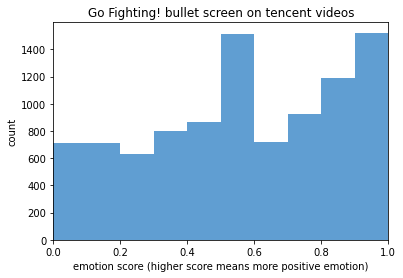

In [117]:
#  绘制情感分直方图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

bins = np.arange(0, 1.1, 0.1)
plt.hist(qq_df['emotion'], bins, color = '#4F94CD', alpha=0.9)
plt.xlim(0, 1)
plt.xlabel('emotion score (higher score means more positive emotion)')
plt.ylabel('count')
plt.title('Go Fighting! bullet screen on tencent videos')
plt.show()

In [101]:
key_words = jieba.analyse.extract_tags(sentence=qq_all_danmu_text, topK=10, withWeight=True, allowPOS=())
key_words

[('艺兴', 0.24210771335619422),
 ('张艺兴', 0.22173231173710858),
 ('哈哈哈', 0.19897758700733748),
 ('王迅', 0.11705867989004111),
 ('小猪', 0.10987341004022325),
 ('2020', 0.09708279594976105),
 ('哈哈哈哈', 0.07711942110597333),
 ('好看', 0.06930356167253116),
 ('哈哈', 0.06848718222587308),
 ('黄磊', 0.06831752307575778)]

In [102]:
df_bad=qq_df[qq_df['emotion']<0.2]
df_bad.head()

,contents,emotion
34565,整天来着骂人真没必要，骂再多也是你最菜的,0.024979
24734,黄渤太逗了,0.076660
8434,感觉他还没睡,0.195046
42846,艺兴太笨了,0.089279
21576,按叫醒的顺序来的啊,0.020986


In [121]:
bad_text = ''
for i in df_bad['contents']:
    bad_text += i
#消极评论关键词top10
key_words = jieba.analyse.extract_tags(sentence=bad_text, topK=100, withWeight=True, allowPOS=())
key_words

[('张艺兴', 0.39373367546145993),
 ('艺兴', 0.1865054252185863),
 ('孙红雷', 0.14357882674243067),
 ('2022', 0.09210144455238829),
 ('2020', 0.09210144455238829),
 ('顺序', 0.08609453056352273),
 ('节目', 0.07556194906520801),
 ('摄像', 0.07393099647800461),
 ('2021', 0.06907608341429122),
 ('极限', 0.06536020263112288),
 ('黄渤', 0.0621684750728621),
 ('起床', 0.057480176396700694),
 ('叫醒', 0.05504384808875193),
 ('你们', 0.05467080304322034),
 ('黄磊', 0.050655794503813564),
 ('11', 0.050655794503813564),
 ('搞笑', 0.04869051689676426),
 ('智商', 0.0481942025918644),
 ('干嘛', 0.04635274568058167),
 ('骂人', 0.039914783522005004),
 ('就是', 0.038809327818459166),
 ('12', 0.03684057782095532),
 ('不是', 0.036496630809899844),
 ('镜头', 0.03481410427046418),
 ('太晃', 0.03453804170714561),
 ('这个', 0.03435405532078197),
 ('大哥', 0.03372488116501348),
 ('人家', 0.0326361607958205),
 ('时间', 0.03221516273706857),
 ('王迅', 0.029932969479526193),
 ('10', 0.029932969479526193),
 ('怎么', 0.02894206357791217),
 ('韩国', 0.02808297109073575)

In [122]:
#接下来用刚才的消极词汇做搜索确认结果
qq_df[qq_df['contents'].str.contains("VIP")]

,contents,emotion
17835,VIP :来自官方的吐槽，这智商偏偏抓的是黄磊，哈哈哈...,0.515868
6700,只有我一个VIP,0.183877
17398,尊贵的VIP已上线,0.146070
29453,VIP用蓝光看，老清晰了,0.821417
7537,VIP :从第四季过来的，你不是一个人。,0.475596
26403,VIP :三精三傻就是这么分出来的[6周年],0.343479
17068,VIP :这时候还是小绵羊，后来就变成小狐狸了,0.739374
29763,VIP :孙红雷太有型啦！,0.047261
5242,前面VIP的，LV大势啊,0.519397
25857,VIP :神算子专属bgm,0.163138


In [123]:
qq_df[qq_df['contents'].str.contains("疫情")]

,contents,emotion
1060,2022年3月21日 疫情早日好起来,0.064421
24645,2022年5月11日，疫情被关，重温综艺yyds 节目,0.121834
163,2022年2022年5月18打卡怀念没有疫情的那些年,0.517487
16208,那个时候还没有疫情,0.548818
14501,疫情期间，有时间看了,0.334133
5123,2022年4月14号，上海疫情严重，希望早点好起来！,0.378715
15048,2022.6.21夏至，四川成都，疫情很轻,0.749974
2629,2022年五月11号 希望疫情早点过去小猪早点复出,0.451093
14468,2023年疫情消失了吗,0.562255
13384,上海疫情爆发，回家上网课,0.908016
